# 1.2 다문화청소년패널 데이터

- [1 데이터세트 합치기 예시](#1-데이터세트-합치기-예시)
- [2 다문화청소년 패널 데이터 만들기](#2-다문화청소년-패널-데이터-만들기)
- [3 학업성적 분석](#3-학업성적-분석)
- [4 설명변수 탐색적 분석](#4-설명변수-탐색적-분석)

## 1 데이터세트 합치기 예시

### 예시 데이터세트

In [1]:
import pandas as pd
import numpy as np

df_S_w1 = pd.DataFrame({'ID': [1, 2, 2, 3],
                        'PID': [100, 101, 102, 103],
                        'WAVE_w1': [1, 1, 1, 1],
                        'score_w1': [1, 2, 3, 4]
                       })
print('df_S_w1:')
print(df_S_w1)

df_P_w1 = pd.DataFrame({'ID': [1, 2, 3],
                        'WAVE_w1': [1, 1, 1],
                        'income_w1': [100, 200, 300]
                       })
print('\ndf_P_w1:')
print(df_P_w1)

df_S_w1:
   ID  PID  WAVE_w1  score_w1
0   1  100        1         1
1   2  101        1         2
2   2  102        1         3
3   3  103        1         4

df_P_w1:
   ID  WAVE_w1  income_w1
0   1        1        100
1   2        1        200
2   3        1        300


### 데이터세트 병합 파이썬 함수

In [2]:
import pandas as pd

# 두 개의 데이터프레임 생성
data1 = pd.DataFrame({'A': [1, 2, 3],
                      'B': ['a', 'b', 'c']})

data2 = pd.DataFrame({'A': [4, 5, 6],
                      'B': ['d', 'e', 'f']})

# concat 함수를 사용하여 데이터프레임 합치기 (수직 방향으로 합침)
concatenated_data = pd.concat([data1, data2], ignore_index=True)

print(concatenated_data)

   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e
5  6  f


In [3]:
import pandas as pd

# 주어진 데이터프레임 생성
data_S_w1 = {
    'ID': [1, 2, 2, 3],
    'PID': [100, 101, 102, 103],
    'WAVE_w1': [1, 1, 1, 1],
    'score_w1': [1, 2, 3, 4]
}

data_P_w1 = {
    'ID': [1, 2, 3],
    'WAVE_w1': [1, 1, 1],
    'income_w1': [100, 200, 300]
}

df_S_w1 = pd.DataFrame(data_S_w1)
df_P_w1 = pd.DataFrame(data_P_w1)

# "_w1" 접미사 제거
df_S_w1.columns = df_S_w1.columns.str.replace('_w1', '')
df_P_w1.columns = df_P_w1.columns.str.replace('_w1', '')

# 데이터프레임 병합
merged_data = pd.merge(df_S_w1, df_P_w1, on='ID', how='inner')

print(merged_data)

   ID  PID  WAVE_x  score  WAVE_y  income
0   1  100       1      1       1     100
1   2  101       1      2       1     200
2   2  102       1      3       1     200
3   3  103       1      4       1     300


In [4]:
import pandas as pd

# 주어진 데이터프레임 생성
data_S_w1 = {
    'ID': [1, 2, 2, 3],
    'PID': [100, 101, 102, 103],
    'WAVE_w1': [1, 1, 1, 1],
    'score_w1': [1, 2, 3, 4]
}

data_P_w1 = {
    'ID': [1, 2, 3],
    'WAVE_w1': [1, 1, 1],
    'income_w1': [100, 200, 300]
}

df_S_w1 = pd.DataFrame(data_S_w1)
df_P_w1 = pd.DataFrame(data_P_w1)

# "_w1" 접미사 제거
df_S_w1.columns = df_S_w1.columns.str.replace('_w1', '')
df_P_w1.columns = df_P_w1.columns.str.replace('_w1', '')

# 데이터프레임 병합
merged_data = pd.merge(df_S_w1, df_P_w1, on='ID', how='inner')

# 중복된 접미사 제거 및 공통 변수만 포함
merged_data.columns = merged_data.columns.str.replace(
    r'_x$', '', regex=True).str.replace(r'_y$', '', regex=True)
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

print(merged_data)

   ID  PID  WAVE  score  income
0   1  100     1      1     100
1   2  101     1      2     200
2   2  102     1      3     200
3   3  103     1      4     300


In [5]:
import pandas as pd

print('merged_data:')
print(merged_data)

df_w2 = pd.DataFrame({
    'ID': [1, 2, 2, 4],
    'PID': [100, 101, 102, 104],
    'WAVE': [2, 2, 2, 2],
    'score': [1, 2, 3, 4],
    'income': [110, 210, 210, 310],
    'new': [4, 3, 2, 1]
})
print('\ndf_w2')
print(df_w2)

merged_data:
   ID  PID  WAVE  score  income
0   1  100     1      1     100
1   2  101     1      2     200
2   2  102     1      3     200
3   3  103     1      4     300

df_w2
   ID  PID  WAVE  score  income  new
0   1  100     2      1     110    4
1   2  101     2      2     210    3
2   2  102     2      3     210    2
3   4  104     2      4     310    1


In [6]:
# 두 데이터프레임을 결합하여 panel_data로 지정
panel_data = pd.concat([merged_data, df_w2], ignore_index=True)

print(panel_data)

   ID  PID  WAVE  score  income  new
0   1  100     1      1     100  NaN
1   2  101     1      2     200  NaN
2   2  102     1      3     200  NaN
3   3  103     1      4     300  NaN
4   1  100     2      1     110  4.0
5   2  101     2      2     210  3.0
6   2  102     2      3     210  2.0
7   4  104     2      4     310  1.0


### 패널 데이터: Long vs. Wide

In [7]:
import pandas as pd

# long 패널 데이터를 wide 패널 데이터로 변환
wide_panel_data = panel_data.pivot(index='PID', columns='WAVE')

print(wide_panel_data)

       ID      score      income        new     
WAVE    1    2     1    2      1      2   1    2
PID                                             
100   1.0  1.0   1.0  1.0  100.0  110.0 NaN  4.0
101   2.0  2.0   2.0  2.0  200.0  210.0 NaN  3.0
102   2.0  2.0   3.0  3.0  200.0  210.0 NaN  2.0
103   3.0  NaN   4.0  NaN  300.0    NaN NaN  NaN
104   NaN  4.0   NaN  4.0    NaN  310.0 NaN  1.0


In [8]:
# wide_panel_data에서 1부터 2까지 WAVE의 'score'만 추출
scores_1_to_2 = wide_panel_data['score'][[1, 2]]

print(scores_1_to_2)

WAVE    1    2
PID           
100   1.0  1.0
101   2.0  2.0
102   3.0  3.0
103   4.0  NaN
104   NaN  4.0


## 2 다문화청소년 패널 데이터 만들기

### 데이터 다운로딩

>원시(raw) 데이터는 <a href="https://www.nypi.re.kr/archive/mps/program/examinDataCode/dataDwloadAgreeView?menuId=MENU00226">한국청소년정책연구원</a>에서 다운로드 받는다. 
>
>다음 명령문은 다운로드 받은 다문화청소년 1기 패널 1차년도부터 10차년도까지의 청소년 및 학부모 CSV 파일을 불러들이는 작업이다. 

**데이터 파일 수정**

* 다운로드 받은 다문화청소년 패널 데이터 파일 중 하나가 comma로 구분된 것이 아니라 tab으로 구분된 오류를 발견하여 이를 다른 것과 동일한 comma seperated 형식으로 바꾸는 작업부터 출발한다. 

    import pandas as pd

    # 주어진 파일 경로
    file_path = (r"C:\1 다문화\Data\다문화청소년패널조사(1기 2기)_csv\1기\학부모" +
                 r"\다문화청소년패널 1기패널 학부모 9차년도_original.csv")

    # 파일을 tab으로 분리하여 읽기
    df = pd.read_csv(file_path, sep='\t')

    # 변경된 데이터를 comma로 분리하여 새로운 파일로 저장
    new_file_path = (r"C:\1 다문화\Data\다문화청소년패널조사(1기 2기)_csv\1기\학부모" +
                     r"\다문화청소년패널 1기패널 학부모 9차년도.csv")
    df.to_csv(new_file_path, index=False)

    print("파일 변환 완료!")

### 패널 데이터 만들기

    import pandas as pd
    import os

    # 다문화청소년패널조사(1기 2기)_csv\1기 폴더 경로
    base_folder = r"C:\1 다문화\Data\다문화청소년패널조사(1기 2기)_csv\1기"

    # 각 연차별로 패널 데이터를 만들기 위한 반복문
    panel_data_list = []
    for year in range(1, 11):  # 1차년도부터 10차년도까지
        youth_file = os.path.join(base_folder, "청소년", 
                                  f"다문화청소년패널 1기패널 청소년 {year}차년도.csv")
        parent_file = os.path.join(base_folder, "학부모", 
                                   f"다문화청소년패널 1기패널 학부모 {year}차년도.csv")

        # (1) 두 데이터세트를 합치기 전에 "_w{연차}" 접미사 제거
        youth_data = pd.read_csv(youth_file).rename(
            columns=lambda x: x.replace(f"_w{year}", ""))
        parent_data = pd.read_csv(parent_file).rename(
            columns=lambda x: x.replace(f"_w{year}", ""))

        # (2) ID 컬럼을 기준으로 청소년과 학부모 데이터세트 결합
        merged_data = pd.merge(youth_data, parent_data, on='ID', how='inner')

        # (3) 공통 변수 처리
        merged_data.columns = merged_data.columns.str.replace(
            r'_x$', '', regex=True).str.replace(r'_y$', '', regex=True)
        merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

        # 각 연차 별로 결합된 데이터프레임을 리스트에 추가
        panel_data_list.append(merged_data)

    # (4) 모든 연차의 패널 데이터를 하나로 결합하여 "panel_data" 생성
    panel_data = pd.concat(panel_data_list)

    # (5) "panel_data"를 CSV 파일로 저장
    panel_data.to_csv(os.path.join(base_folder, "panel_data_0.csv"), index=False)

In [9]:
import pandas as pd

panel_data = pd.read_csv('../Data/panel_data_0.csv', low_memory=False)
panel_data

,ID,PID,WAVE,SURVEY1,S_GENDER,S_AGE,S_AREA1,par_age_1,par_age_2,par_edu_1,...,youth_policy_c12,youth_policy_c13,filter_$,p_social_aware_a01,p_social_aware_a02,p_social_aware_a03,p_social_aware_a04,p_social_aware_b01,p_social_aware_b02,p_social_aware_b03
0,1,100003,1,1,2,10,2,35,46,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100008,1,1,2,10,2,31,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,100012,1,1,1,10,2,38,43,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,100016,1,1,1,9,2,33,37,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100022,1,1,1,10,2,37,38,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16345,1630,107538,10,1,1,19,3,39,46,4,...,,,0.0,3,4,4,4,4,3,4
16346,1631,107542,10,1,2,19,3,47,55,4,...,,,0.0,4,5,4,4,4,5,4
16347,1632,107547,10,1,1,19,3,44,55,4,...,,,0.0,4,4,3,4,5,4,4
16348,1633,107554,10,1,2,19,3,46,54,4,...,,,0.0,4,3,4,4,3,4,4


### 데이터 유형 확인 및 변경

In [10]:
# panel_data의 변수 별 데이터 유형 확인
data_types = panel_data.dtypes

# 데이터 유형 종류 확인
unique_data_types = data_types.unique()

print("panel_data의 변수 별 데이터 유형:")
print(data_types)

print("\npanel_data에 있는 데이터 유형 종류:")
print(unique_data_types)

panel_data의 변수 별 데이터 유형:
ID                     int64
PID                    int64
WAVE                  object
SURVEY1               object
S_GENDER              object
                       ...  
p_social_aware_a03    object
p_social_aware_a04    object
p_social_aware_b01    object
p_social_aware_b02    object
p_social_aware_b03    object
Length: 1135, dtype: object

panel_data에 있는 데이터 유형 종류:
[dtype('int64') dtype('O') dtype('float64')]


In [11]:
# panel_data의 'object' 타입의 변수들을 실수형으로 변환
for column in panel_data.select_dtypes(include='object').columns:
    panel_data[column] = pd.to_numeric(panel_data[column], errors='coerce')

# 변환된 데이터 유형 확인
data_types_after_conversion = panel_data.dtypes

print("panel_data의 변수 별 데이터 유형(변환 후):")
print(data_types_after_conversion)

panel_data의 변수 별 데이터 유형(변환 후):
ID                      int64
PID                     int64
WAVE                  float64
SURVEY1               float64
S_GENDER              float64
                       ...   
p_social_aware_a03    float64
p_social_aware_a04    float64
p_social_aware_b01    float64
p_social_aware_b02    float64
p_social_aware_b03    float64
Length: 1135, dtype: object


### 결측값 처리

In [12]:
print("값이 -9인 경우의 수:", (panel_data == -9).sum().sum())
print("값이 -8인 경우의 수:", (panel_data == -8).sum().sum())
print("값이 -7인 경우의 수:", (panel_data == -7).sum().sum())
print("값이 -6인 경우의 수:", (panel_data == -6).sum().sum())

값이 -9인 경우의 수: 816
값이 -8인 경우의 수: 6232
값이 -7인 경우의 수: 46
값이 -6인 경우의 수: 11


In [13]:
import numpy as np

# panel_data에서 값이 -9, -8, -7, -6인 경우를 결측값으로 처리
panel_data.replace([-9, -8, -7, -6], np.nan, inplace=True)

In [14]:
print("값이 -9인 경우의 수:", (panel_data == -9).sum().sum())
print("값이 -8인 경우의 수:", (panel_data == -8).sum().sum())
print("값이 -7인 경우의 수:", (panel_data == -7).sum().sum())
print("값이 -6인 경우의 수:", (panel_data == -6).sum().sum())

값이 -9인 경우의 수: 0
값이 -8인 경우의 수: 0
값이 -7인 경우의 수: 0
값이 -6인 경우의 수: 0


## 3 개별 변수 분석

### 연차별 평균 국어 성적

In [15]:
# 'panel_data'의 'score_01' 변수에 대해 'WAVE' 별로 평균값 계산
mean_score_by_wave = panel_data.groupby('WAVE')['score_01'].mean()

print(mean_score_by_wave)

WAVE
1.0     3.735168
2.0     3.781333
3.0     3.765073
4.0     3.423913
5.0     3.440238
6.0     3.435666
7.0     3.290476
8.0     3.260652
9.0     3.276614
10.0         NaN
Name: score_01, dtype: float64


**연차별 평균 국어 성적 계산(wide 패널)**

In [16]:
# panel_data를 wide 타입으로 변환하여 'wide_panel'이라는 이름으로 저장
wide_panel = panel_data.pivot_table(index='PID', columns='WAVE')

print(wide_panel)

            ID                                                          \
WAVE      1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0    
PID                                                                      
100003     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
100008     2.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0   
100012     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0   
100016     4.0     4.0     4.0     4.0     4.0     4.0     4.0     4.0   
100022     5.0     NaN     NaN     NaN     NaN     NaN     NaN     5.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
107538  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0   
107542  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0   
107547  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0   
107554  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0   
107560  1634.0  1634.0  1634.0  1634.0

In [17]:
# wide_panel에서 score_01(국어 성적) 변수 출력
score_01_wide = wide_panel['score_01']

print(score_01_wide)

WAVE    1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
PID                                                
100003  5.0  4.0  3.0  3.0  4.0  3.0  3.0  4.0  3.0
100008  5.0  5.0  5.0  4.0  3.0  3.0  4.0  4.0  3.0
100012  5.0  3.0  4.0  3.0  3.0  4.0  3.0  4.0  3.0
100016  5.0  4.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0
100022  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...     ...  ...  ...  ...  ...  ...  ...  ...  ...
107538  3.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0
107542  4.0  3.0  3.0  3.0  4.0  4.0  4.0  4.0  4.0
107547  3.0  4.0  4.0  3.0  3.0  3.0  4.0  3.0  3.0
107554  4.0  4.0  4.0  4.0  4.0  4.0  4.0  3.0  4.0
107560  2.0  3.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0

[1635 rows x 9 columns]


In [18]:
# wide_panel에서 score_01(국어 성적) 변수의 평균값 계산
score_01_mean = wide_panel['score_01'].mean()

print(score_01_mean)

WAVE
1.0    3.735168
2.0    3.781333
3.0    3.765073
4.0    3.423913
5.0    3.440238
6.0    3.435666
7.0    3.290476
8.0    3.260652
9.0    3.276614
dtype: float64


### 종합 성적 변수

In [19]:
# panel_data에서 각 PID 별로 score_01부터 score_05까지의 평균값 계산하여 'score_overall'로 지정
panel_data['score_overall'] = panel_data[
    ['score_01', 'score_02', 'score_03', 'score_04', 'score_05']].mean(axis=1)

print(panel_data[['PID', 'WAVE', 'score_overall']])

          PID  WAVE  score_overall
0      100003   1.0            4.6
1      100008   1.0            4.2
2      100012   1.0            3.8
3      100016   1.0            3.6
4      100022   1.0            2.8
...       ...   ...            ...
16345  107538  10.0            NaN
16346  107542  10.0            NaN
16347  107547  10.0            NaN
16348  107554  10.0            NaN
16349  107560  10.0            NaN

[16350 rows x 3 columns]


**종합 성적 평균 변화 추이**

In [20]:
# 'panel_data'에서 연차별 score_overall 변수의 평균값 계산
score_overall_by_wave = panel_data.groupby('WAVE')['score_overall'].mean()

print(score_overall_by_wave)

WAVE
1.0     3.390459
2.0     3.413867
3.0     3.414553
4.0     3.136087
5.0     3.087602
6.0     3.081565
7.0     3.000635
8.0     2.981523
9.0     3.026483
10.0         NaN
Name: score_overall, dtype: float64


**종합 성적 평균 변화 추이 그래프 그리기**

**그래프 한글 표시**

* 그래프에서 한글이 깨지는 것을 막기 위해서는 아래 명령문을 실행해야 한다.

In [21]:
import matplotlib
from matplotlib import font_manager, rc

font_path = "/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False  # 축에 마이너스 부호 제대로 나오게 하기

위 코드는 Windows에 해당하는 것이고, MacBook의 경우에는 위 명령문 세 번째 줄을 다음과 같이 바꿔야 한다.
```
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
```

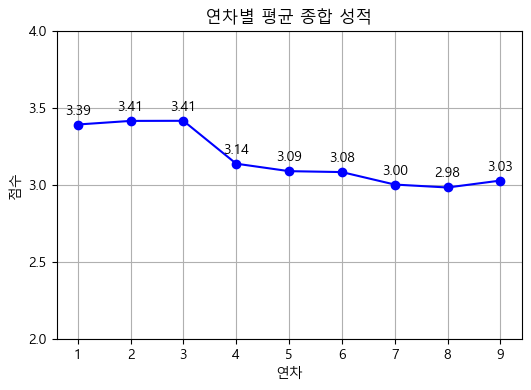

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# panel_data에서 1부터 9까지의 WAVE에 해당하는 데이터 추출
selected_waves = list(range(1, 10))
selected_data = panel_data[panel_data['WAVE'].isin(selected_waves)]

# 연차별 score_overall(종합 성적) 평균값 계산
score_overall_mean_by_wave = selected_data.groupby('WAVE')['score_overall'].mean()

# 그래프 크기 설정
plt.figure(figsize=(6, 4))

# 선 그래프 그리기
plt.plot(score_overall_mean_by_wave.index, 
         score_overall_mean_by_wave.values, marker='o', linestyle='-', color='b')

# 데이터 레이블(소수점 2자리) 추가 (간격 조정)
for x, y in zip(score_overall_mean_by_wave.index, score_overall_mean_by_wave.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom')

# 그래프 타이틀과 축 라벨 설정
plt.title('연차별 평균 종합 성적')
plt.xlabel('연차')
plt.ylabel('점수')

# 세로축 범위, 틱 값 설정
plt.ylim(2, 4)
plt.yticks([2.0, 2.5, 3.0, 3.5, 4.0])

# 그래프 출력
plt.grid(True)
plt.show()

### 6개 성적 그래프

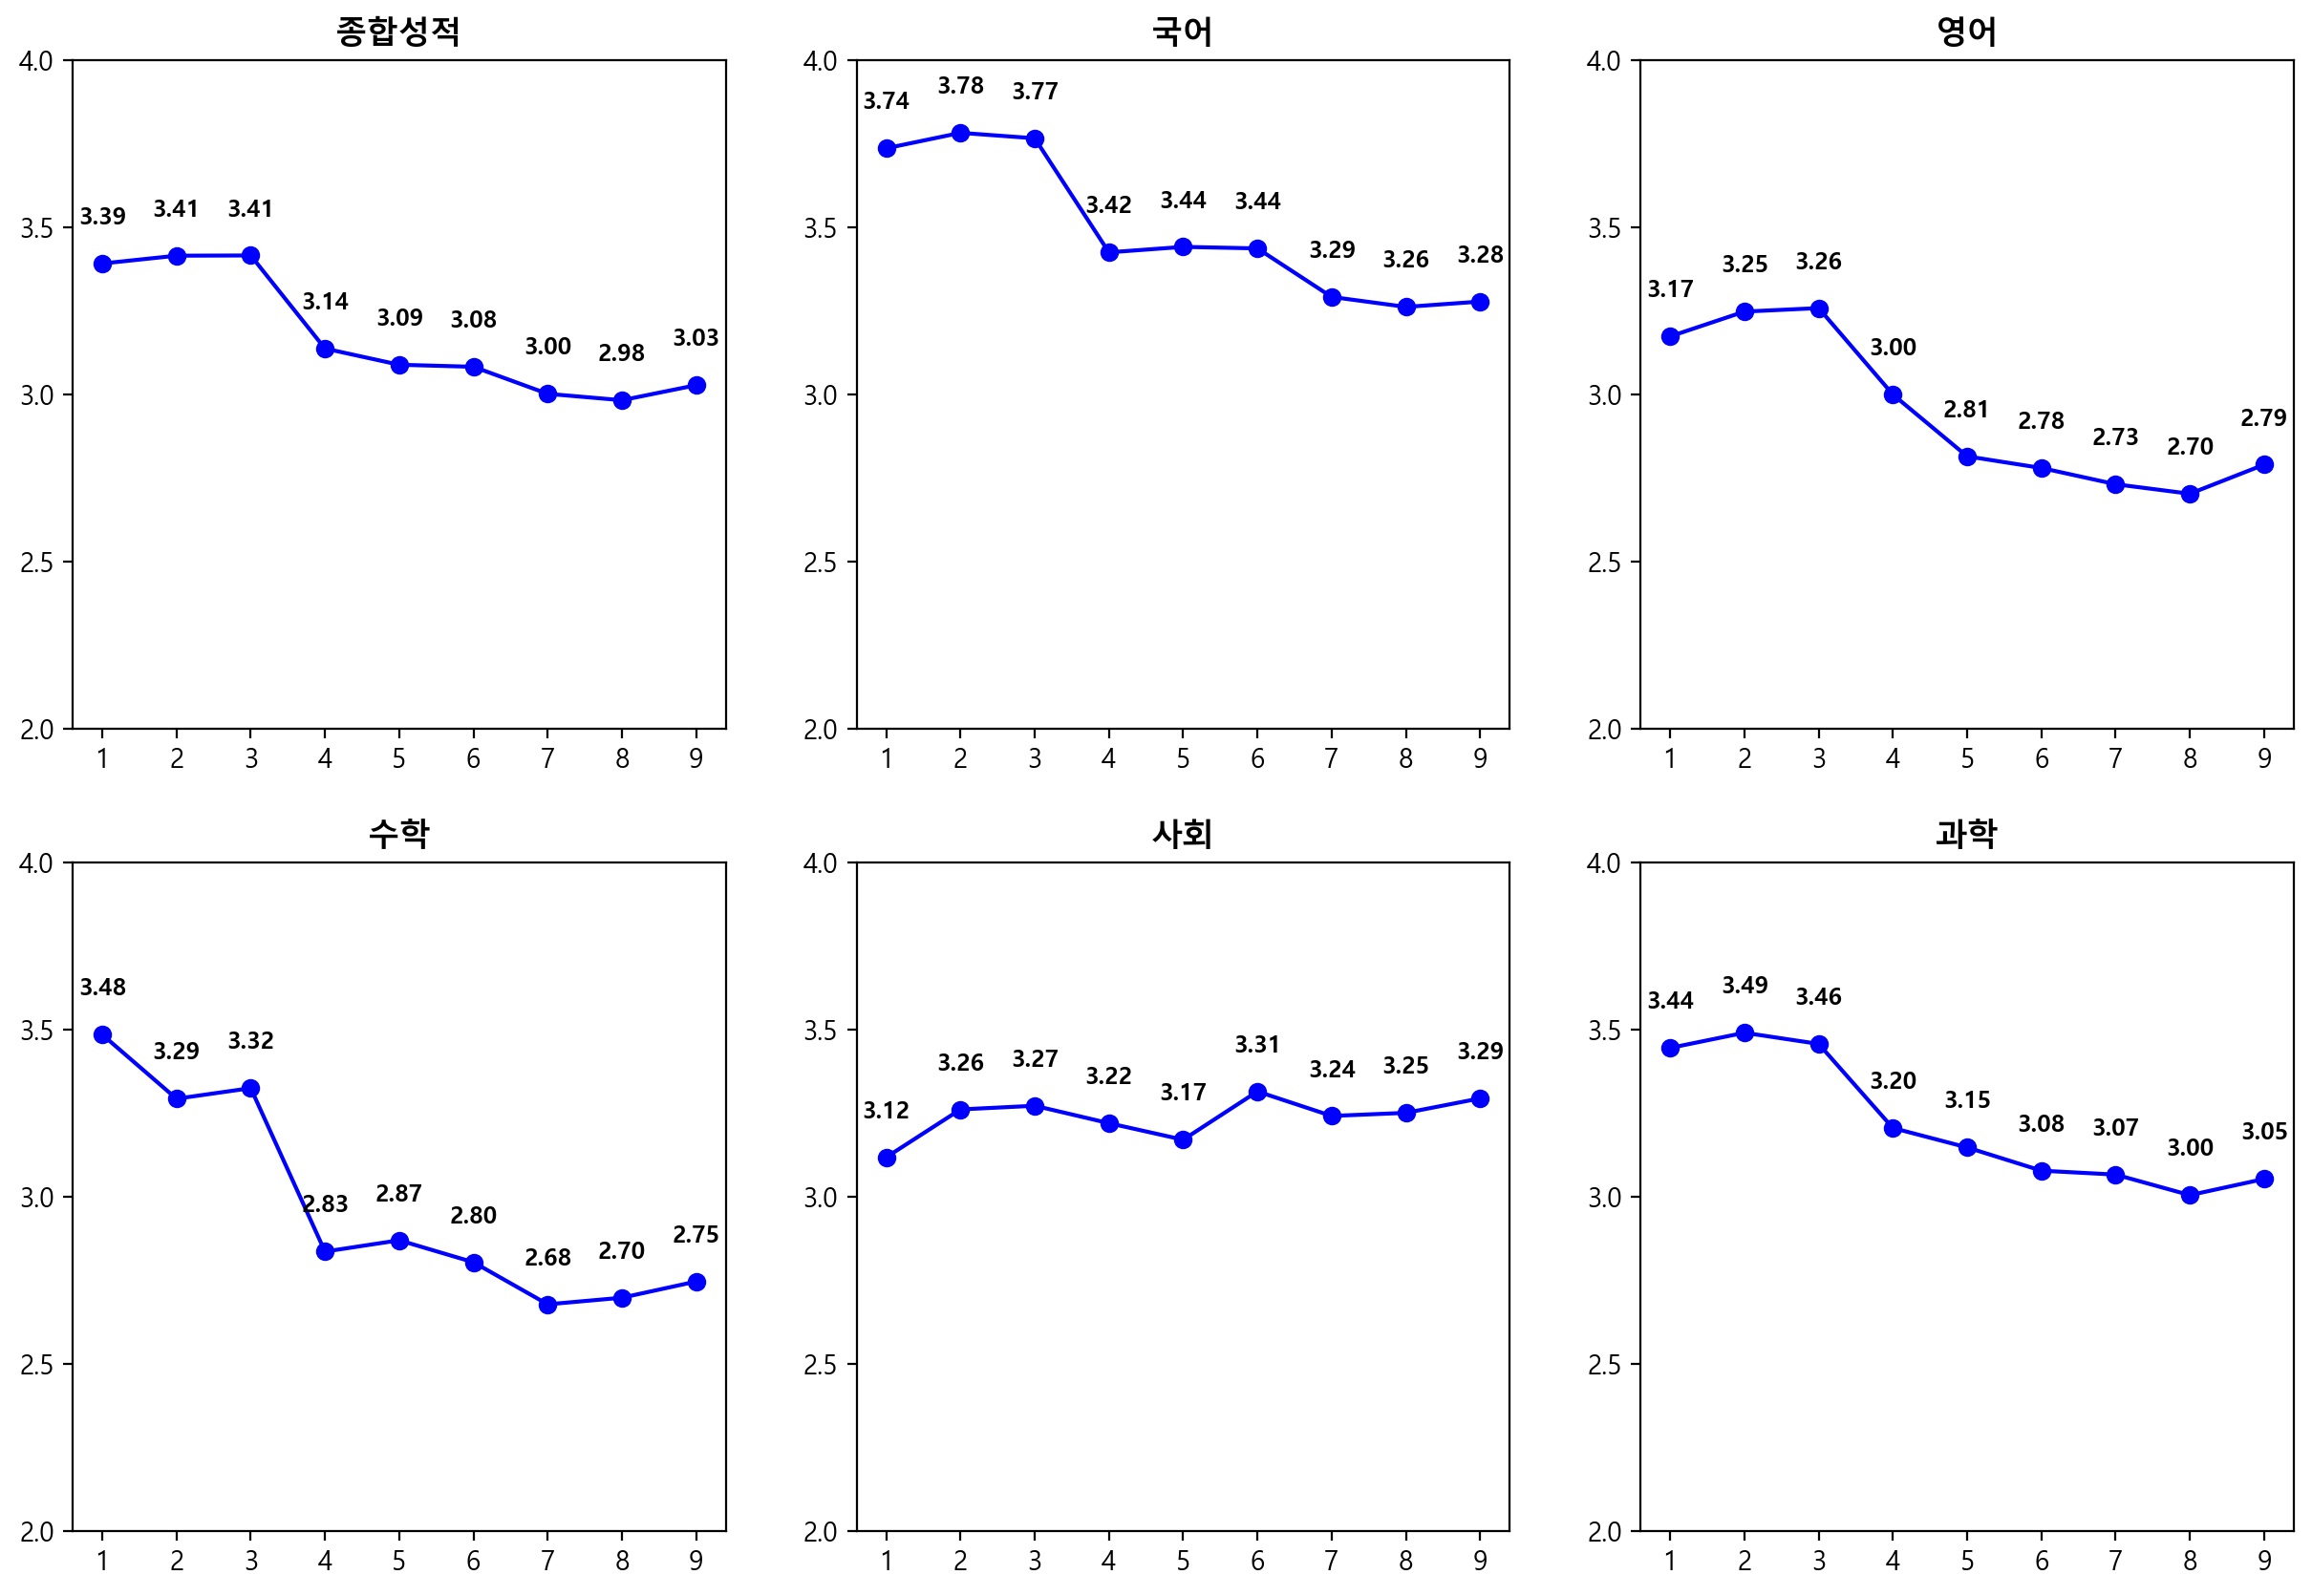

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# panel_data에서 1부터 9까지의 WAVE에 해당하는 데이터 추출
selected_waves = list(range(1, 10))
selected_data = panel_data[panel_data['WAVE'].isin(selected_waves)]

# 그래프 크기 설정
plt.figure(figsize=(15, 10), dpi=200)

# 그래프의 행과 열 개수 설정
num_rows = 2
num_cols = 3

# 그래프 종류와 그래프 제목 설정
graphs = {
    'score_overall': '종합성적',
    'score_01': '국어',
    'score_02': '영어',
    'score_03': '수학',
    'score_04': '사회',
    'score_05': '과학',
}

# 그래프 그리기
for idx, (var_name, title) in enumerate(graphs.items(), start=1):
    plt.subplot(num_rows, num_cols, idx)
    plt.plot(selected_data.groupby('WAVE')[var_name].mean(), 
             marker='o', linestyle='-', color='b')

    # 데이터 레이블(소수점 2자리) 추가 (간격 조정)
    for x, y in zip(selected_waves, selected_data.groupby('WAVE')[var_name].mean()):
        plt.text(x, y + 0.1, f'{y:.2f}', ha='center', va='bottom', 
                 fontsize=9, fontweight='bold')

    # 그래프 제목 설정 (bold 처리)
    plt.title(title, fontsize=12, fontweight='bold')

    # 가로축 눈금 설정
    plt.xticks(selected_waves)

    # 세로축 범위, 틱 값 설정
    plt.ylim(2, 4)
    plt.yticks([2.0, 2.5, 3.0, 3.5, 4.0])

# 그래프 간의 간격 조정
#plt.tight_layout()

# 그리드 없애기
plt.grid(False)

# 그래프 출력
plt.show()

### 과목별 성적 상관계수 행렬

In [24]:
correlation_matrix = panel_data[
    ['score_01', 'score_02', 'score_03', 'score_04', 'score_05']].corr()
print(correlation_matrix)

          score_01  score_02  score_03  score_04  score_05
score_01  1.000000  0.423211  0.363510  0.498693  0.468477
score_02  0.423211  1.000000  0.426380  0.331706  0.341875
score_03  0.363510  0.426380  1.000000  0.315694  0.478630
score_04  0.498693  0.331706  0.315694  1.000000  0.538303
score_05  0.468477  0.341875  0.478630  0.538303  1.000000


### 연차별 성적 상관계수 행렬

* 앞에서 연차 별로 5개 과목 성적을 평균하여 만든 종합 성적(`score_overall`) 변수에 대해 상관계수 행렬을 만들어 보려고 한다. 이 작업은 wide 패널이 더 간단하기 때문에 앞에서 사용한 long 패널인 `panel_data`를 wide 타입으로 변환시킨 다음에 ChatGPT의 도움을 받기로 한다.

In [25]:
# panel_data를 wide 타입으로 변환하여 'wide_panel'이라는 이름으로 저장
wide_panel = panel_data.pivot_table(index='PID', columns='WAVE')
wide_panel

ID                                                          \
WAVE      1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0    
PID                                                                      
100003     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
100008     2.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0   
100012     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0   
100016     4.0     4.0     4.0     4.0     4.0     4.0     4.0     4.0   
100022     5.0     NaN     NaN     NaN     NaN     NaN     NaN     5.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
107538  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0  1630.0   
107542  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0  1631.0   
107547  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0  1632.0   
107554  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0  1633.0   
107560  1634.0  1634.0  1634.0  1634.0  1634.0  1634.0  1634.0  1634.0   

                        ... youth_policy_c04 youth_policy_c05  \
WAVE      9.0     10.0  ...             10.0             10.0   
PID                     ...                                     
100003     1.0     1.0  ...              NaN              NaN   
100008     2.0     2.0  ...              NaN              NaN   
100012     3.0     3.0  ...              NaN              NaN   
100016     4.0     4.0  ...              5.0              NaN   
100022     5.0     5.0  ...              NaN              NaN   
...        ...     ...  ...              ...              ...   
107538  1630.0  1630.0  ...              NaN              NaN   
107542  1631.0  1631.0  ...              NaN              NaN   
107547  1632.0  1632.0  ...              NaN              NaN   
107554  1633.0  1633.0  ...              NaN              NaN   
107560  1634.0  1634.0  ...              NaN              NaN   

       youth_policy_c06 youth_policy_c07 youth_policy_c08 youth_policy_c09  \
WAVE               10.0             10.0             10.0             10.0   
PID                                                                          
100003              NaN              NaN              NaN              NaN   
100008              NaN              NaN              NaN              NaN   
100012              NaN              NaN              NaN              NaN   
100016              NaN              NaN              5.0              5.0   
100022              NaN              NaN              NaN              NaN   
...                 ...              ...              ...              ...   
107538              NaN              NaN              NaN              NaN   
107542              NaN              NaN              NaN              NaN   
107547              NaN              NaN              NaN              NaN   
107554              NaN              NaN              NaN              NaN   
107560              NaN              NaN              NaN              NaN   

       youth_policy_c10 youth_policy_c11 youth_policy_c12 youth_policy_c13  
WAVE               10.0             10.0             10.0             10.0  
PID                                                                         
100003              NaN              NaN              NaN              NaN  
100008              NaN              NaN              NaN              NaN  
100012              NaN              NaN              NaN              NaN  
100016              5.0              5.0              4.0              5.0  
100022              NaN              NaN              NaN              NaN  
...                 ...              ...              ...              ...  
107538              NaN              NaN              NaN              NaN  
107542              NaN              NaN              NaN              NaN  
107547              NaN              NaN              NaN              NaN  
107554              NaN              NaN       

In [26]:
# wide_panel에서 연차 별 score_overall(종합 성적)의 상관계수 행렬 구하기
correlation_matrix = wide_panel.loc[:, 'score_overall'].corr()
correlation_matrix

WAVE,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
WAVE,,,,,,,,,
1.0,1.000000,0.508178,0.512133,0.426120,0.374644,0.391845,0.292141,0.252097,0.278864
2.0,0.508178,1.000000,0.576268,0.510946,0.413864,0.421059,0.351529,0.315889,0.305440
3.0,0.512133,0.576268,1.000000,0.588392,0.472554,0.512864,0.420495,0.376708,0.357967
4.0,0.426120,0.510946,0.588392,1.000000,0.656938,0.629315,0.482796,0.449411,0.432241
5.0,0.374644,0.413864,0.472554,0.656938,1.000000,0.693395,0.485416,0.430875,0.412313
6.0,0.391845,0.421059,0.512864,0.629315,0.693395,1.000000,0.552288,0.508603,0.472638
7.0,0.292141,0.351529,0.420495,0.482796,0.485416,0.552288,1.000000,0.658597,0.599557
8.0,0.252097,0.315889,0.376708,0.449411,0.430875,0.508603,0.658597,1.000000,0.685118
9.0,0.278864,0.305440,0.357967,0.432241,0.412313,0.472638,0.599557,0.685118,1.000000


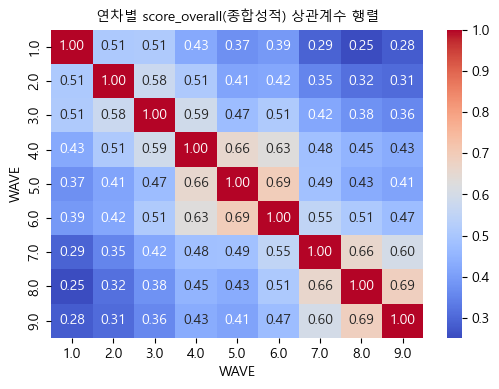

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 그래프 제목 설정
plt.title('연차별 score_overall(종합성적) 상관계수 행렬', fontsize=10)

# 그래프 출력
plt.show()

**만든 패널 데이터 저장하기**

In [28]:
panel_data.to_csv('../Data/panel_data.csv', index=False)

## 4 설명변수 탐색적 분석

**데이터세트 불러오기**

In [29]:
import pandas as pd

panel_data = pd.read_csv('../Data/panel_data.csv')
panel_data

,ID,PID,WAVE,SURVEY1,S_GENDER,S_AGE,S_AREA1,par_age_1,par_age_2,par_edu_1,...,youth_policy_c13,filter_$,p_social_aware_a01,p_social_aware_a02,p_social_aware_a03,p_social_aware_a04,p_social_aware_b01,p_social_aware_b02,p_social_aware_b03,score_overall
0,1,100003,1.0,1.0,2.0,10.0,2.0,35.0,46.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6
1,2,100008,1.0,1.0,2.0,10.0,2.0,31.0,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2
2,3,100012,1.0,1.0,1.0,10.0,2.0,38.0,43.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8
3,4,100016,1.0,1.0,1.0,9.0,2.0,33.0,37.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6
4,5,100022,1.0,1.0,1.0,10.0,2.0,37.0,38.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16345,1630,107538,10.0,1.0,1.0,19.0,3.0,39.0,46.0,4.0,...,NaN,0.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,NaN
16346,1631,107542,10.0,1.0,2.0,19.0,3.0,47.0,55.0,4.0,...,NaN,0.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN
16347,1632,107547,10.0,1.0,1.0,19.0,3.0,44.0,55.0,4.0,...,NaN,0.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,NaN
16348,1633,107554,10.0,1.0,2.0,19.0,3.0,46.0,54.0,4.0,...,NaN,0.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,NaN


### 대학 진학 그룹과 비진학 그룹

In [30]:
import pandas as pd

# WAVE가 10인 경우의 데이터 추출
selected_data = panel_data[panel_data['WAVE'] == 10]

# 'uni_a01' 변수의 값별 관측 개수 계산
value_counts = selected_data['uni_a01'].value_counts(dropna=False)

# 'uni_a01' 변수의 값별 비율 계산
value_percentages = selected_data['uni_a01'].value_counts(normalize=True, 
                                                          dropna=False) * 100

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame({'Count': value_counts, 'Percentage(%)': value_percentages})

# 결과 출력
print(result_df)

     Count  Percentage(%)
1.0    717      43.853211
NaN    544      33.272171
2.0    374      22.874618


In [31]:
import pandas as pd

# uni_a01 값이 1인 학생(대학에 진학한 학생)과 2인 학생(대학에 진학하지 않은 학생)의 PID 추출
university_students = panel_data[panel_data['uni_a01'] == 1]['PID']
non_university_students = panel_data[panel_data['uni_a01'] == 2]['PID']

# 각 그룹에 대해 1부터 9까지의 WAVE 별로 score_overall 평균값 계산
university_scores = []
non_university_scores = []

for wave in range(1, 10):
    university_score_mean = panel_data[
        (panel_data['PID'].isin(university_students)) 
        & (panel_data['WAVE'] == wave)]['score_overall'].mean()
    non_university_score_mean = panel_data[
        (panel_data['PID'].isin(non_university_students)) 
        & (panel_data['WAVE'] == wave)]['score_overall'].mean()
    
    university_scores.append(university_score_mean)
    non_university_scores.append(non_university_score_mean)

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame({
    '연차': list(range(1, 10)),
    '대학 진학 평균 성적': university_scores,
    '대학 미진학 평균 성적': non_university_scores
})

# 결과 출력
result_df

,연차,대학 진학 평균 성적,대학 미진학 평균 성적
0,1,3.415900,3.324064
1,2,3.444852,3.298378
2,3,3.482138,3.308311
3,4,3.200843,3.003753
4,5,3.155775,2.959677
5,6,3.194390,2.872432
6,7,3.074302,2.889918
7,8,3.029775,2.890449
8,9,3.075809,2.935714


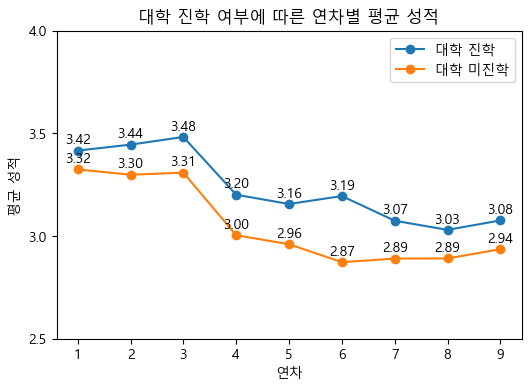

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# uni_a01 값이 1인 학생(대학에 진학한 학생)과 2인 학생(대학에 진학하지 않은 학생)의 PID 추출
university_students = panel_data[panel_data['uni_a01'] == 1]['PID']
non_university_students = panel_data[panel_data['uni_a01'] == 2]['PID']

# 각 그룹에 대해 1부터 9까지의 WAVE 별로 score_overall 평균값 계산
university_scores = []
non_university_scores = []

for wave in range(1, 10):
    university_score_mean = panel_data[
        (panel_data['PID'].isin(university_students)) 
        & (panel_data['WAVE'] == wave)]['score_overall'].mean()
    non_university_score_mean = panel_data[
        (panel_data['PID'].isin(non_university_students))
        & (panel_data['WAVE'] == wave)]['score_overall'].mean()
    
    university_scores.append(university_score_mean)
    non_university_scores.append(non_university_score_mean)

# 선 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), university_scores, marker='o', label='대학 진학')
plt.plot(range(1, 10), non_university_scores, marker='o', label='대학 미진학')

# 데이터 레이블과 마커 간의 간격 조정
for i, txt in enumerate(university_scores):
    plt.annotate("{:.2f}".format(txt), (i+1, university_scores[i]), 
                 xytext=(0, 5), textcoords='offset points', ha='center')

for i, txt in enumerate(non_university_scores):
    plt.annotate("{:.2f}".format(txt), (i+1, non_university_scores[i]), 
                 xytext=(0, 5), textcoords='offset points', ha='center')

# 그래프 제목, 축 레이블 설정
plt.title('대학 진학 여부에 따른 연차별 평균 성적', fontsize=12)
plt.xlabel('연차')
plt.ylabel('평균 성적')

# 세로축 범위와 틱 설정
plt.ylim(2.5, 4)
plt.yticks([2.5, 3.0, 3.5, 4.0], fontsize=10)

# 그리드 제거
plt.grid(False)

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

### 남학생 vs. 여학생

**성별이 여러 값을 갖는 경우 최빈값으로 통일: `GENDER`**

In [33]:
import pandas as pd
import numpy as np

# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
def calculate_mode(group):
    # S_GENDER의 최빈값 계산
    mode_value = group['S_GENDER'].mode()
    if not mode_value.empty:
        return mode_value.iloc[0] # iloc[0]는 첫 번째(가장 크기가 작은) 최빈값
    else:
        return np.nan  # 모든 값이 결측인 경우 NaN 반환

# 각 ID에 대한 최빈값을 가진 시리즈 생성
GENDER = grouped.apply(calculate_mode)

# 새로운 컬럼 GENDER를 생성하여 ID별로 계산된 최빈값 매핑
panel_data['GENDER'] = panel_data['ID'].map(GENDER)

# 결과를 확인
print(panel_data[['ID', 'S_GENDER', 'GENDER']])

         ID  S_GENDER  GENDER
0         1       2.0     2.0
1         2       2.0     2.0
2         3       1.0     1.0
3         4       1.0     1.0
4         5       1.0     1.0
...     ...       ...     ...
16345  1630       1.0     1.0
16346  1631       2.0     2.0
16347  1632       1.0     1.0
16348  1633       2.0     2.0
16349  1634       1.0     1.0

[16350 rows x 3 columns]


In [34]:
import pandas as pd

# 학생 성별(GENDER)이 남성(1)인 데이터 추출
male_students = panel_data[panel_data['GENDER'] == 1]

# 학생 성별(GENDER)이 여성(2)인 데이터 추출
female_students = panel_data[panel_data['GENDER'] == 2]

# 남학생과 여학생의 평균 성적 계산
male_mean_score = male_students['score_overall'].mean()
female_mean_score = female_students['score_overall'].mean()

# 남학생과 여학생의 관측수 계산 (결측값을 제외한 관측의 개수)
male_observation_count = male_students['score_overall'].count()
female_observation_count = female_students['score_overall'].count()

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame({
    '성별': ['남학생', '여학생'],
    '관측수': [male_observation_count, female_observation_count],
    '평균 성적': [male_mean_score, female_mean_score]
})

# 결과 출력
print(result_df)

    성별   관측수     평균 성적
0  남학생  6040  3.220251
1  여학생  6197  3.153351


In [35]:
import pandas as pd
from scipy.stats import ttest_ind

# 학생 성별(GENDER)이 남성(1)인 데이터 추출
male_students = panel_data[panel_data['GENDER'] == 1]

# 학생 성별(GENDER)이 여성(2)인 데이터 추출
female_students = panel_data[panel_data['GENDER'] == 2]

# t-검정 수행
t_stat, p_value = ttest_ind(male_students['score_overall'], female_students['score_overall'], equal_var=False)

# 결과 출력
if p_value < 0.05:
    print("성별 평균 성적에 유의미한 차이가 있습니다.")
else:
    print("성별 평균 성적에 유의미한 차이가 없습니다.")

성별 평균 성적에 유의미한 차이가 없습니다.


In [36]:
import pandas as pd
from scipy.stats import ttest_ind

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall'])

# 학생 성별(GENDER)이 남성(1)인 데이터 추출
male_students = cleaned_panel_data[cleaned_panel_data['GENDER'] == 1]

# 학생 성별(GENDER)이 여성(2)인 데이터 추출
female_students = cleaned_panel_data[cleaned_panel_data['GENDER'] == 2]

# t-검정 수행
t_stat, p_value = ttest_ind(male_students['score_overall'], 
                            female_students['score_overall'], equal_var=False)

# 통계적 유의성(5% 유의수준) 판단
if p_value < 0.05:
    statistical_significance = "유의하다"
else:
    statistical_significance = "유의하지 않다"

# 결과 출력
print("t_stat:", t_stat)
print("p_value:", p_value)
print("통계적 유의성(5% 유의수준):", statistical_significance)

t_stat: 5.07156529306311
p_value: 4.0037600910261123e-07
통계적 유의성(5% 유의수준): 유의하다


### 거주지역

* S_AREA1: 거주지역
>* 1.서울 
>* 2.경인(경기+인천) 
>* 3.충청 및 강원권 
>* 4.경상권 
>* 5.전라 및 제주권

In [37]:
import pandas as pd
from scipy.stats import f_oneway

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall'])

# 거주지역(S_AREA1)별로 그룹화하여 데이터 추출
grouped_area_data = [group['score_overall'] for _, 
                     group in cleaned_panel_data.groupby('S_AREA1')]

# ANOVA 검정 수행
f_stat, p_value = f_oneway(*grouped_area_data)

# 통계적 유의성(5% 유의수준) 판단
if p_value < 0.05:
    statistical_significance = "유의하다"
else:
    statistical_significance = "유의하지 않다"

# 결과 출력
print("검정통계량 (F-statistic):", f_stat)
print("p-value:", p_value)
print("통계적 유의성 (5% 유의수준):", statistical_significance)

검정통계량 (F-statistic): 8.47601789882217
p-value: 7.96136082387677e-07
통계적 유의성 (5% 유의수준): 유의하다


### 지역규모

* S_AREA1: 거주지 지역규모
>* 1.대도시
>* 2.중소도시 
>*  3.읍/면

In [38]:
import pandas as pd
from scipy.stats import f_oneway

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall'])

# 지역규모(S_AREA2)별로 그룹화하여 데이터 추출
grouped_area_size_data = [group['score_overall'] for _, 
                          group in cleaned_panel_data.groupby('S_AREA2')]

# ANOVA 검정 수행
f_stat, p_value = f_oneway(*grouped_area_size_data)

# 통계적 유의성(5% 유의수준) 판단
if p_value < 0.05:
    statistical_significance = "유의하다"
else:
    statistical_significance = "유의하지 않다"

# 결과 출력
print("검정통계량 (F-statistic):", f_stat)
print("p-value:", p_value)
print("통계적 유의성 (5% 유의수준):", statistical_significance)

검정통계량 (F-statistic): 6.310142339448936
p-value: 0.0018246108287821932
통계적 유의성 (5% 유의수준): 유의하다


### 어머니 연령

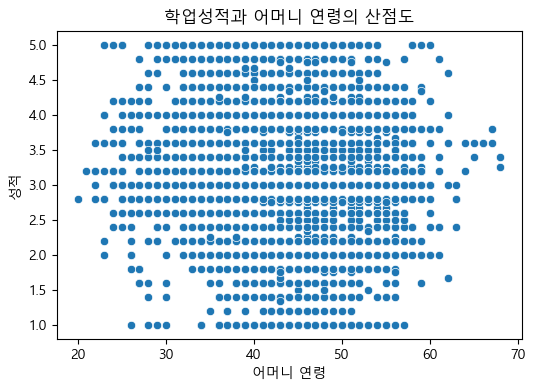

상관계수: -0.1104533455433847


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_age_1'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='par_age_1', y='score_overall', data=cleaned_panel_data)
plt.xlabel("어머니 연령")
plt.ylabel("성적")
plt.title("학업성적과 어머니 연령의 산점도")
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['par_age_1'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 아버지 연령

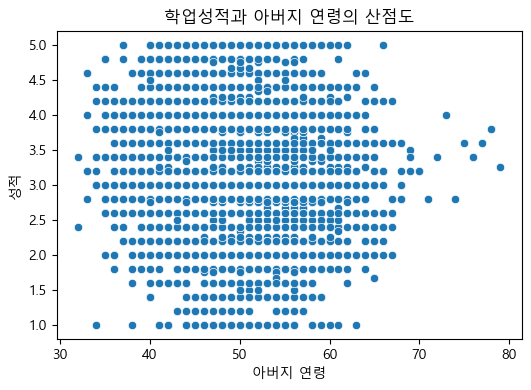

상관계수: -0.13727097080260833


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_age_2'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='par_age_2', y='score_overall', data=cleaned_panel_data)
plt.xlabel("아버지 연령")
plt.ylabel("성적")
plt.title("학업성적과 아버지 연령의 산점도")
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['par_age_2'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 어머니 학력

* par_edu_m: 어머니 학력
>* 1.중졸 이하 
>* 2.고졸 
>* 3.대학(2~3년제) 졸업 
>* 4.대학교(4년제 이상) 졸업
>* 5.대학원 졸업(석박사 포함)

**어머니 학력이 여러 값을 갖는 경우 최빈값으로 통일: `par_edu_m`**

In [41]:
import pandas as pd
import numpy as np

# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
def calculate_mode(group):
    # par_edu_1의 최빈값 계산
    mode_value = group['par_edu_1'].mode()
    if not mode_value.empty:
        return mode_value.iloc[0] # iloc[0]는 첫 번째(가장 크기가 작은) 최빈값
    else:
        return np.nan  # 모든 값이 결측인 경우 NaN 반환

# 각 ID에 대한 최빈값을 가진 시리즈 생성
par_edu_m = grouped.apply(calculate_mode)

# 새로운 컬럼 GENDER를 생성하여 ID별로 계산된 최빈값 매핑
panel_data['par_edu_m'] = panel_data['ID'].map(par_edu_m)

# 결과를 확인
print(panel_data[['ID', 'par_edu_1', 'par_edu_m']])

         ID  par_edu_1  par_edu_m
0         1        3.0        3.0
1         2        2.0        2.0
2         3        4.0        4.0
3         4        2.0        2.0
4         5        2.0        2.0
...     ...        ...        ...
16345  1630        4.0        4.0
16346  1631        4.0        4.0
16347  1632        4.0        4.0
16348  1633        4.0        4.0
16349  1634        1.0        1.0

[16350 rows x 3 columns]


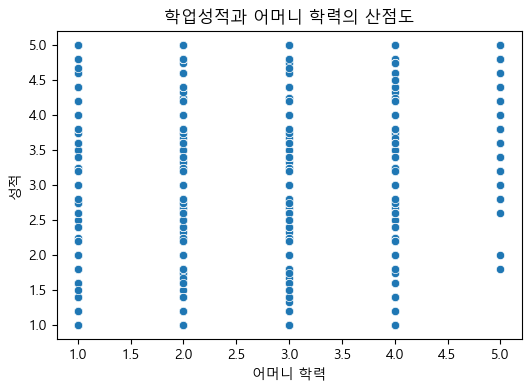

상관계수: 0.11904654581268331


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_edu_m'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='par_edu_m', y='score_overall', data=cleaned_panel_data)
plt.xlabel("어머니 학력")
plt.ylabel("성적")
plt.title("학업성적과 어머니 학력의 산점도")
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['par_edu_m'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)


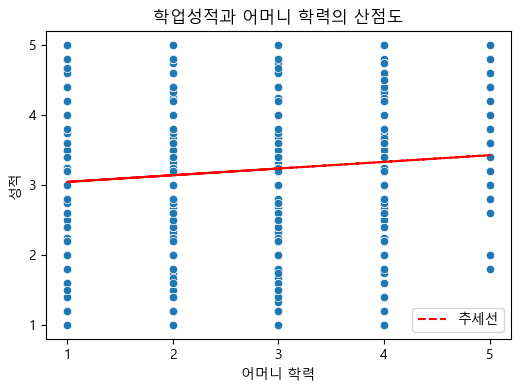

상관계수: 0.11904654581268331


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_edu_m'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='par_edu_m', y='score_overall', data=cleaned_panel_data)
plt.xlabel("어머니 학력")
plt.ylabel("성적")
plt.title("학업성적과 어머니 학력의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['par_edu_m'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['par_edu_m'], 
         p(cleaned_panel_data['par_edu_m']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['par_edu_m'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 아버지 학력

**아버지 학력이 여러 값을 갖는 경우 최빈값으로 통일: `par_edu_f`**

In [44]:
import pandas as pd
import numpy as np

# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
def calculate_mode(group):
    # par_edu_2의 최빈값 계산
    mode_value = group['par_edu_2'].mode()
    if not mode_value.empty:
        return mode_value.iloc[0] # iloc[0]는 첫 번째(가장 크기가 작은) 최빈값
    else:
        return np.nan  # 모든 값이 결측인 경우 NaN 반환

# 각 ID에 대한 최빈값을 가진 시리즈 생성
par_edu_f = grouped.apply(calculate_mode)

# 새로운 컬럼 GENDER를 생성하여 ID별로 계산된 최빈값 매핑
panel_data['par_edu_f'] = panel_data['ID'].map(par_edu_f)

# 결과를 확인
print(panel_data[['ID', 'par_edu_2', 'par_edu_f']])

         ID  par_edu_2  par_edu_f
0         1        2.0        2.0
1         2        4.0        4.0
2         3        2.0        2.0
3         4        2.0        2.0
4         5        2.0        2.0
...     ...        ...        ...
16345  1630        4.0        4.0
16346  1631        1.0        1.0
16347  1632        2.0        2.0
16348  1633        2.0        2.0
16349  1634        1.0        1.0

[16350 rows x 3 columns]


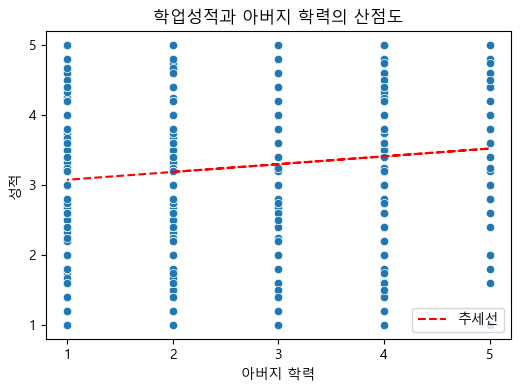

상관계수: 0.14261512401472337


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_edu_f'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='par_edu_f', y='score_overall', data=cleaned_panel_data)
plt.xlabel("아버지 학력")
plt.ylabel("성적")
plt.title("학업성적과 아버지 학력의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['par_edu_f'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['par_edu_f'], 
         p(cleaned_panel_data['par_edu_f']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['par_edu_f'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 소득수준

In [46]:
# 가구의 월평균 소득수준(income_01)을 100으로 나눠서 income 변수를 생성
panel_data['income'] = panel_data['income_01'] / 100

# income_01과 income 변수만 프린트 (처음 5행)
print(panel_data[['income_01', 'income']].head())

   income_01  income
0      320.0     3.2
1      200.0     2.0
2      250.0     2.5
3      300.0     3.0
4      300.0     3.0


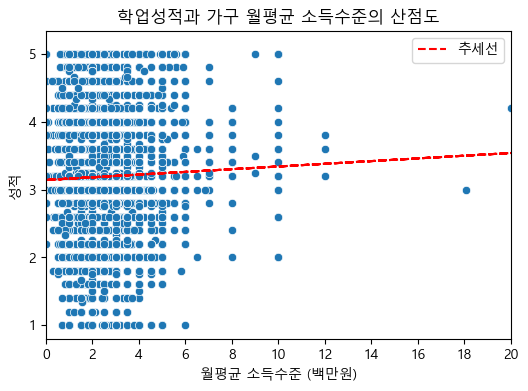

상관계수: 0.04088612456706029


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'income'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='income', y='score_overall', data=cleaned_panel_data)
plt.xlabel("월평균 소득수준 (백만원)")
plt.ylabel("성적")
plt.title("학업성적과 가구 월평균 소득수준의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['income'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['income'], 
         p(cleaned_panel_data['income']), 'r--', label='추세선')

plt.xlim(0, 20)
plt.xticks(np.arange(0, 21, 2))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['income'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 가정형편에 대한 지각

* income_03: 가정형편에 대한 지각(학부모 대상 조사)
>* 1.아주 어렵다
>* 2.어려운 편이다
>* 3.보통이다
>* 4.잘사는 편이다       
>* 5.아주 잘 산다

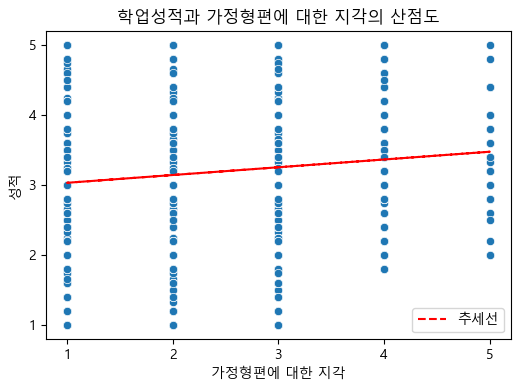

상관계수: 0.11431450349777178


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'income_03'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='income_03', y='score_overall', data=cleaned_panel_data)
plt.xlabel("가정형편에 대한 지각")
plt.ylabel("성적")
plt.title("학업성적과 가정형편에 대한 지각의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['income_03'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['income_03'], 
         p(cleaned_panel_data['income_03']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6))
plt.yticks(np.arange(1, 6))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['income_03'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 부모의 외국인 여부

* par_foreigner_01: 부모의 외국인 여부
>* 1.아버지 
>* 2.어머니 
>* 3.두 분 모두 
>* 4.두 분 모두 한국인(▶1차년도 없음)

In [49]:
import pandas as pd

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_foreigner_01'])

# 부모의 외국인 여부에 따른 평균 성적 계산
average_score_by_foreigner = cleaned_panel_data.groupby('par_foreigner_01')['score_overall'].mean()
observation_count_by_foreigner = cleaned_panel_data['par_foreigner_01'].value_counts()

# 표로 제시
result_table = pd.DataFrame({
    '부모의 외국인 여부': ['아버지', '어머니', '두 분 모두', '두 분 모두 한국인(1차년도 없음)'],
    '관측수': observation_count_by_foreigner,
    '평균 성적': average_score_by_foreigner
})

result_table['관측수'] = result_table['관측수'].apply(lambda x: f'{x:,}')

print(result_table)
print()

from scipy.stats import ttest_ind

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'par_foreigner_01'])

# 부모의 외국인 여부에 따른 데이터 분리
group1 = cleaned_panel_data[cleaned_panel_data['par_foreigner_01'] == 1]['score_overall']
group2 = cleaned_panel_data[cleaned_panel_data['par_foreigner_01'] == 2]['score_overall']
group3 = cleaned_panel_data[cleaned_panel_data['par_foreigner_01'] == 3]['score_overall']
group4 = cleaned_panel_data[cleaned_panel_data['par_foreigner_01'] == 4]['score_overall']

# t-검정 수행
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
statistical_significance = p_value < 0.05

print("검정통계량:", t_stat)
print("p-value:", p_value)
print("통계적 유의성(5% 유의수준):", statistical_significance)


              부모의 외국인 여부     관측수     평균 성적
1.0                  아버지     429  3.279487
2.0                  어머니  11,764  3.182956
3.0               두 분 모두      37  3.311712
4.0  두 분 모두 한국인(1차년도 없음)       7  2.557143

검정통계량: 2.51928570735451
p-value: 0.012100533924424176
통계적 유의성(5% 유의수준): True


### 건강상태

* health_01: 주관적 건강인식
>* 1.매우 건강하다
>* 2.건강한 편이다
>* 3.건강하지 못한 편이다
>* 4.매우 건강하지 못하다

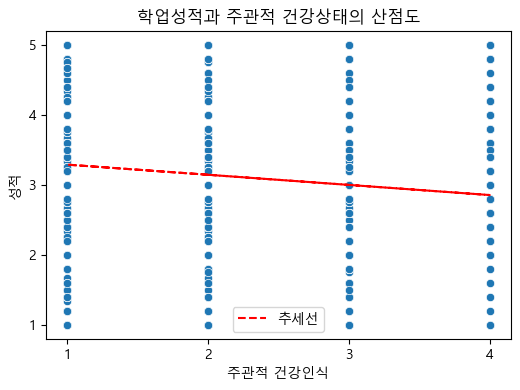

상관계수: -0.12498589124315816


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'health_01'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='health_01', y='score_overall', data=cleaned_panel_data)
plt.xlabel("주관적 건강인식")
plt.ylabel("성적")
plt.title("학업성적과 주관적 건강상태의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['health_01'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['health_01'], 
         p(cleaned_panel_data['health_01']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['health_01'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 삶의 만족도

* life_satis_01: 나는 사는게 즐겁다
* life_satis_02: 나는 걱정거리가 별로 없다
* life_satis_03: 나는 내 삶이 행복하다고 생각한다
>* 1.전혀 그렇지 않다 
>* 2.그렇지 않은 편이다 
>* 3.그런 편이다 
>* 4.매우 그렇다

In [51]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['life_satis'] = panel_data[['life_satis_01', 
                                       'life_satis_02', 
                                       'life_satis_03']].mean(axis=1)

# life_satis 변수를 프린트하여 확인
panel_data['life_satis']

0        4.000000
1        4.000000
2        2.000000
3        4.000000
4        4.000000
           ...   
16345    3.000000
16346    3.333333
16347    3.000000
16348    3.000000
16349    3.000000
Name: life_satis, Length: 16350, dtype: float64

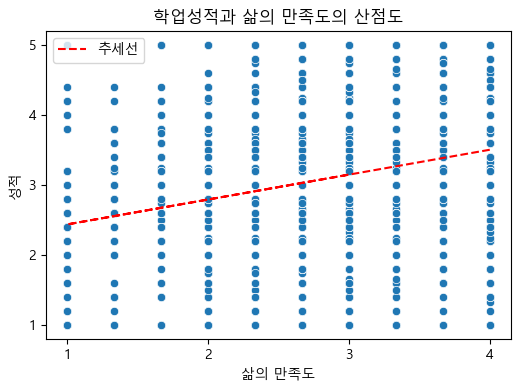

상관계수: 0.29909434343221114


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'life_satis'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='life_satis', y='score_overall', data=cleaned_panel_data)
plt.xlabel("삶의 만족도")
plt.ylabel("성적")
plt.title("학업성적과 삶의 만족도의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['life_satis'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['life_satis'], 
         p(cleaned_panel_data['life_satis']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['life_satis'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 학업성적 만족도

* satis_score_01: 성적에 대한 만족도 
>* 1.매우 만족한다 
>* 2.만족하는 편이다 
>* 3.만족하지 않는 편이다 
>* 4.전혀 만족하지 않는다

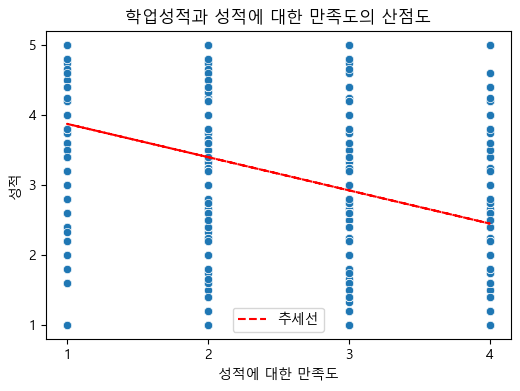

상관계수: -0.5012408709590255


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'satis_score_01'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='satis_score_01', y='score_overall', data=cleaned_panel_data)
plt.xlabel("성적에 대한 만족도")
plt.ylabel("성적")
plt.title("학업성적과 성적에 대한 만족도의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['satis_score_01'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['satis_score_01'], 
         p(cleaned_panel_data['satis_score_01']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['satis_score_01'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 성취동기

* achiev_01: 나는 내가 세운 학습목표를 이루기 위해 노력한다
* achiev_02: 나는 내가 좋아하는 일을 잘하기 위해 끝까지 노력한다
* achiev_03: 나는 내가 가치있다고 생각하는 일에 대해 최선을 다한다
* achiev_04: 나는 나 스스로 학습목표를 결정한다
* achiev_05: 나는 스스로 정한 목표를 향해 나아가는 것을 좋아한다
* achiev_06: 내가 관심있는 일을 시도하는 것을 즐긴다
* achiev_07: 나는 내 자신이 만족할 때까지 노력한다
>* 1.전혀 그렇지 않다 
>* 2.그렇지 않은 편이다 
>* 3.그런 편이다 
>* 4.매우 그렇다

In [54]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['achiev'] = panel_data[['achiev_01',
                                   'achiev_02',
                                   'achiev_03',
                                   'achiev_04',
                                   'achiev_05',
                                   'achiev_06',
                                   'achiev_07']].mean(axis=1)

panel_data['achiev']

0        3.857143
1        4.000000
2        2.714286
3        2.714286
4        2.714286
           ...   
16345         NaN
16346         NaN
16347         NaN
16348         NaN
16349         NaN
Name: achiev, Length: 16350, dtype: float64

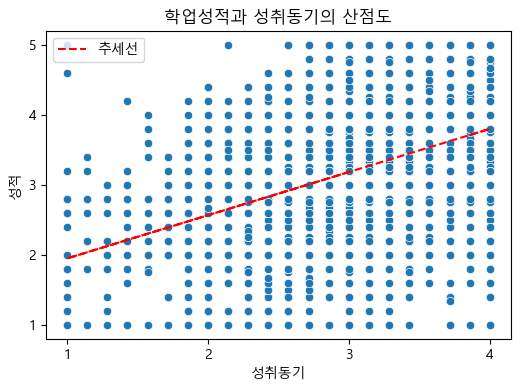

상관계수: 0.41336726835915016


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'achiev'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='achiev', y='score_overall', data=cleaned_panel_data)
plt.xlabel("성취동기")
plt.ylabel("성적")
plt.title("학업성적과 성취동기의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['achiev'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['achiev'], 
         p(cleaned_panel_data['achiev']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['achiev'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 희망 교육수준

* edu_plan_01: 희망 교육수준
> <1~2차 년도>
>* 1.초등학교 2.중학교 3.고등학교 4.대학교
>
> <3~9차 년도>
>* 1.초등학교 2.중학교 3.고등학교 4.대학교  5.대학원

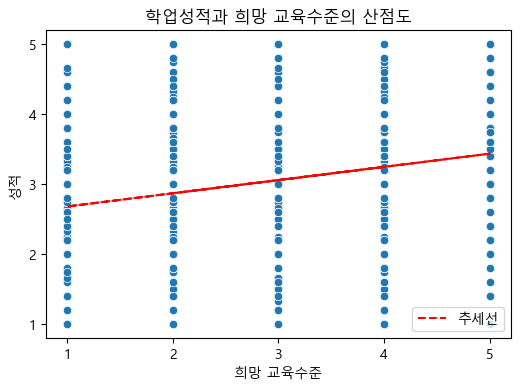

상관계수: 0.19854584025021518


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'edu_plan_01'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='edu_plan_01', y='score_overall', data=cleaned_panel_data)
plt.xlabel("희망 교육수준")
plt.ylabel("성적")
plt.title("학업성적과 희망 교육수준의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['edu_plan_01'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['edu_plan_01'], 
         p(cleaned_panel_data['edu_plan_01']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['edu_plan_01'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 가족의 지지

* fa_support_01: 우리 가족은 서로 많이 도와주는 것 같다
* fa_support_02: 우리 가족은 나를 잘 이해해주는 것 같다
* fa_support_03: 우리 가족은 가지고 있는 것들을 서로 나누어 가지는 것 같다
* fa_support_04: 우리 가족은 내가 힘들어할 때 내게 힘과 용기를 주는 것 같다
* fa_support_05: 우리 가족은 내 생각이나 말을 잘 들어주는 것 같다
* fa_support_06: 우리 가족은 나를 중요한 사람으로 생각하는 것 같다
* fa_support_07: 우리 가족은 나에게 관심이 많은 것 같다
>* 1.전혀 그렇지 않다 
>* 2.그렇지 않은 편이다 
>* 3.그런 편이다 
>* 4.매우 그렇다

In [57]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['fa_support'] = panel_data[['fa_support_01',
                                       'fa_support_02',
                                       'fa_support_03',
                                       'fa_support_04',
                                       'fa_support_05',
                                       'fa_support_06',
                                       'fa_support_07']].mean(axis=1)

panel_data['fa_support']

0        3.000000
1        4.000000
2        3.000000
3        3.714286
4        3.714286
           ...   
16345         NaN
16346         NaN
16347         NaN
16348         NaN
16349         NaN
Name: fa_support, Length: 16350, dtype: float64

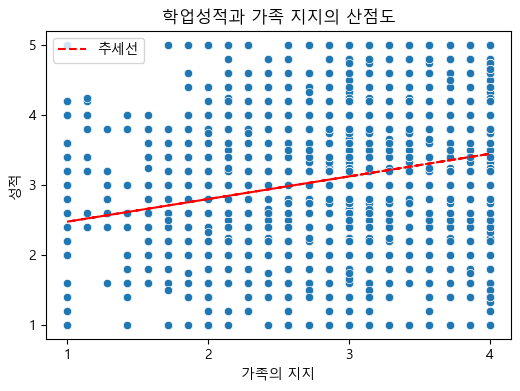

상관계수: 0.2497681078815359


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'fa_support'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='fa_support', y='score_overall', data=cleaned_panel_data)
plt.xlabel("가족의 지지")
plt.ylabel("성적")
plt.title("학업성적과 가족 지지의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['fa_support'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['fa_support'], 
         p(cleaned_panel_data['fa_support']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['fa_support'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 아버지에 대한 생각

* pr_father_01: 아버지에 대한 생각
>* 1.전혀 자랑스럽지 않다    
>* 2.자랑스럽지 않은 편이다
>* 3.보통이다  
>* 4.자랑스러운 편이다  
>* 5.매우 자랑스럽다

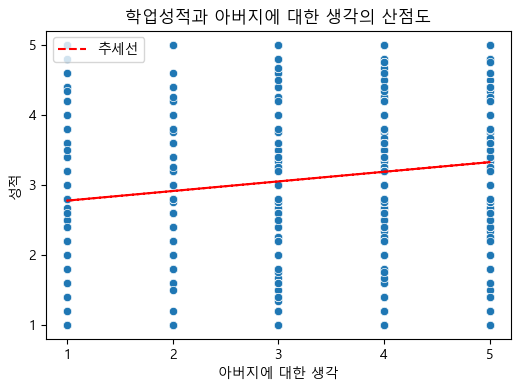

상관계수: 0.17196485730924463


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'pr_father_01'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pr_father_01', y='score_overall', data=cleaned_panel_data)
plt.xlabel("아버지에 대한 생각")
plt.ylabel("성적")
plt.title("학업성적과 아버지에 대한 생각의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['pr_father_01'], 
               cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['pr_father_01'], 
         p(cleaned_panel_data['pr_father_01']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['pr_father_01'
                                ].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 어머니에 대한 생각

* pr_mother_01: 어머니에 대한 생각
>* 1.전혀 자랑스럽지 않다    
>* 2.자랑스럽지 않은 편이다
>* 3.보통이다  
>* 4.자랑스러운 편이다  
>* 5.매우 자랑스럽다

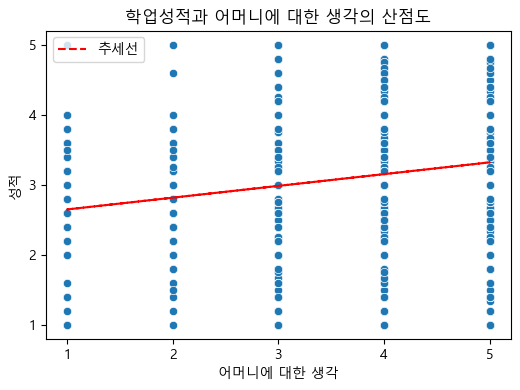

상관계수: 0.18142972877732105


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'pr_mother_01'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pr_mother_01', y='score_overall', data=cleaned_panel_data)
plt.xlabel("어머니에 대한 생각")
plt.ylabel("성적")
plt.title("학업성적과 어머니에 대한 생각의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['pr_mother_01'], 
               cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['pr_mother_01'], 
         p(cleaned_panel_data['pr_mother_01']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['pr_mother_01'
                                ].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 부모의 감독태도

* parenting_a01: 부모님(보호자)은 내가 방과 후에 어디에 가는지 알고 계신다
* parenting_a02: 부모님(보호자)은 내가 시간을 어떻게 보내는지 알고 계신다
* parenting_a03: 부모님(보호자)은 내가 외출할 경우 언제 들어올지 알고 계신다
>* 1.전혀 그렇지 않다 
>* 2.그렇지 않은 편이다 
>* 3.그런 편이다 
>* 4.매우 그렇다

In [61]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['parenting_a'] = panel_data[['parenting_a01',
                                        'parenting_a02',
                                        'parenting_a03']].mean(axis=1)

panel_data['parenting_a']

0        4.0
1        4.0
2        3.0
3        3.0
4        4.0
        ... 
16345    NaN
16346    NaN
16347    NaN
16348    NaN
16349    NaN
Name: parenting_a, Length: 16350, dtype: float64

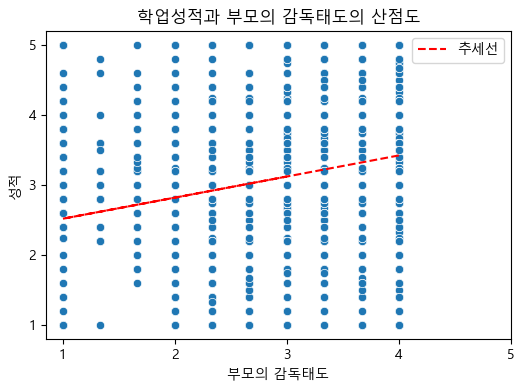

상관계수: 0.24694546543509963


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'parenting_a'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='parenting_a', y='score_overall', data=cleaned_panel_data)
plt.xlabel("부모의 감독태도")
plt.ylabel("성적")
plt.title("학업성적과 부모의 감독태도의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['parenting_a'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['parenting_a'], 
         p(cleaned_panel_data['parenting_a']), 'r--', label='추세선')

plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['parenting_a'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 부모의 방임태도

* parenting_b01: 부모님(보호자)은 나보다 바깥일을 더 중요하게 생각하시는 것 같다
* parenting_b02: 부모님(보호자)은 나에 대해 관심이 없으셔서 칭찬을 하거나 혼내시는 일이 없다
* parenting_b03: 부모님(보호자)은 내가 어떤 생각을 갖고 있는지에 대해 관심이 없으시다
* parenting_b04: 부모님(보호자)은 내가 필요로 할 때 곁에 없으시다
* parenting_b05: 부모님(보호자)은 내가 아플 때에도 귀찮아서 병원에 데려가지 않으신다
>* 1.전혀 그렇지 않다 
>* 2.그렇지 않은 편이다 
>* 3.그런 편이다 
>* 4.매우 그렇다

In [63]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['parenting_b'] = panel_data[['parenting_b01',
                                        'parenting_b02',
                                        'parenting_b03',
                                        'parenting_b04',
                                        'parenting_b05']].mean(axis=1)

panel_data['parenting_b']

0        2.8
1        1.2
2        2.2
3        1.8
4        1.6
        ... 
16345    NaN
16346    NaN
16347    NaN
16348    NaN
16349    NaN
Name: parenting_b, Length: 16350, dtype: float64

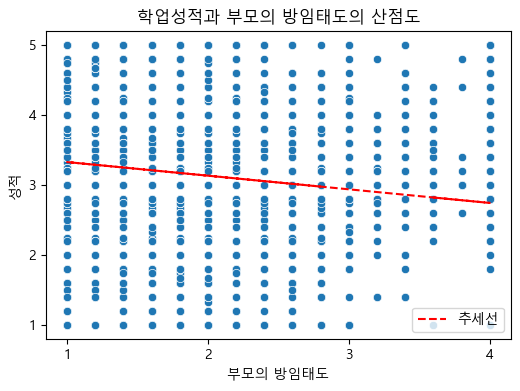

상관계수: -0.16030667688213643


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'parenting_b'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='parenting_b', y='score_overall', data=cleaned_panel_data)
plt.xlabel("부모의 방임태도")
plt.ylabel("성적")
plt.title("학업성적과 부모의 방임태도의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['parenting_b'], cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['parenting_b'], 
         p(cleaned_panel_data['parenting_b']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['parenting_b'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 집단괴롭힘 피해경험

* bullying_01: 다른 학생들로부터 따돌림을 당했다
* bullying_02: 다른 학생들로부터 욕을 듣거나 심한 집적거림이나 또는 놀림을 당했다
* bullying_03: 다른 학생들이 나를 고의로 어떤 일에 끼워주지 않거나 완전히 무시했다
* bullying_04: 다른 학생들로부터 맞거나 발로 차이거나 위협을 당했다
* bullying_05: 나에 대해 거짓소문을 퍼뜨려서 다른 친구들이 나를 싫어하게 되었다
* bullying_06: 다른 학생들로부터 신체적 특징이나 외모에 대해 험한 욕설을 듣거나 놀림을 당했다
>* 1.한 번도 없었다 
>* 2.한 달에 1-2번 있었다
>* 3.한 주에 1-2번 있었다 
>* 4.거의 매일 있었다 

In [65]:
# 결측값을 제외하고 각 변수들의 평균 계산
panel_data['bullying'] = panel_data[['bullying_01',
                                     'bullying_02',
                                     'bullying_03',
                                     'bullying_04',
                                     'bullying_05',
                                     'bullying_06']].mean(axis=1)

panel_data['bullying']

0        1.000000
1        1.166667
2        1.666667
3        1.000000
4        1.000000
           ...   
16345         NaN
16346         NaN
16347         NaN
16348         NaN
16349         NaN
Name: bullying, Length: 16350, dtype: float64

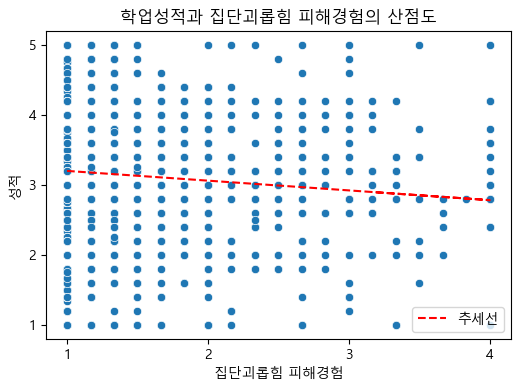

상관계수: -0.05286772325770605


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'bullying'])

# 산점도 그리기
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bullying', y='score_overall', data=cleaned_panel_data)
plt.xlabel("집단괴롭힘 피해경험")
plt.ylabel("성적")
plt.title("학업성적과 집단괴롭힘 피해경험의 산점도")

# 추세선 추가
z = np.polyfit(cleaned_panel_data['bullying'], 
               cleaned_panel_data['score_overall'], 1)
p = np.poly1d(z)
plt.plot(cleaned_panel_data['bullying'], 
         p(cleaned_panel_data['bullying']), 'r--', label='추세선')

plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 6, 1))

plt.legend()
plt.show()

# 상관계수 계산
correlation = cleaned_panel_data['bullying'].corr(cleaned_panel_data['score_overall'])
print("상관계수:", correlation)

### 학교 내 도움을 주는 어른 유무

In [67]:
import pandas as pd

# help_in_sc_01 별 평균 성적 계산
help_in_sc_01_mean_score = panel_data.groupby(
    'help_in_sc_01')['score_overall'].agg(['count', 'mean'])
help_in_sc_01_mean_score.reset_index(inplace=True)
help_in_sc_01_mean_score['count'] = help_in_sc_01_mean_score['count'].map('{:,}'.format)

# 결과 출력
print(help_in_sc_01_mean_score)
print()

# 테스트를 위한 분석 모듈 임포트
from scipy.stats import ttest_ind

# 결측값 제거
help_in_sc_01_filtered = panel_data.dropna(subset=['help_in_sc_01', 'score_overall'])

# 테스트 수행
help_in_sc_01_yes = help_in_sc_01_filtered[help_in_sc_01_filtered[
    'help_in_sc_01'] == 1]['score_overall']
help_in_sc_01_no = help_in_sc_01_filtered[help_in_sc_01_filtered[
    'help_in_sc_01'] == 2]['score_overall']
t_stat, p_value = ttest_ind(help_in_sc_01_yes, help_in_sc_01_no)

# 테스트 결과 출력
print("T-statistic:", t_stat)
print("p-value:", p_value)
print("통계적 유의성(5% 유의수준):", p_value < 0.05)


   help_in_sc_01  count      mean
0            1.0  5,688  3.216002
1            2.0  6,549  3.160638

T-statistic: 4.188813442749567
p-value: 2.8238302970807963e-05
통계적 유의성(5% 유의수준): True


### 학교 밖 도움을 주는 어른 유무

In [68]:
import pandas as pd

# help_community_01 별 평균 성적 계산
help_community_01_mean_score = panel_data.groupby(
    'help_community_01')['score_overall'].agg(['count', 'mean'])
help_community_01_mean_score.reset_index(inplace=True)
help_community_01_mean_score['count'] = help_community_01_mean_score[
    'count'].map('{:,}'.format)

# 결과 출력
print(help_community_01_mean_score)
print()

# 테스트를 위한 분석 모듈 임포트
from scipy.stats import ttest_ind

# 결측값 제거
help_community_01_filtered = panel_data.dropna(subset=[
    'help_community_01', 'score_overall'])

# 테스트 수행
help_community_01_yes = help_community_01_filtered[
    help_community_01_filtered['help_community_01'] == 1]['score_overall']
help_community_01_no = help_community_01_filtered[
    help_community_01_filtered['help_community_01'] == 2]['score_overall']
t_stat, p_value = ttest_ind(help_community_01_yes, help_community_01_no)

# 테스트 결과 출력
print("T-statistic:", t_stat)
print("p-value:", p_value)
print("통계적 유의성(5% 유의수준):", p_value < 0.05)


   help_community_01  count      mean
0                1.0  4,107  3.313639
1                2.0  8,130  3.122081

T-statistic: 13.81843498284439
p-value: 4.1566473096887125e-43
통계적 유의성(5% 유의수준): True


### 대학 비진학 이유

In [69]:
import pandas as pd

# uni_a01_1에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['uni_a01_1'] == 1]['PID']
group_2_pids = panel_data[panel_data['uni_a01_1'] == 2]['PID']
group_3_pids = panel_data[panel_data['uni_a01_1'] == 3]['PID']
group_4_pids = panel_data[panel_data['uni_a01_1'] == 4]['PID']
group_5_pids = panel_data[panel_data['uni_a01_1'] == 5]['PID']
group_6_pids = panel_data[panel_data['uni_a01_1'] == 6]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data[
    'PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data[
    'PID'].isin(group_2_pids)]['score_overall'].mean()
group_3_mean_score = panel_data[panel_data[
    'PID'].isin(group_3_pids)]['score_overall'].mean()
group_4_mean_score = panel_data[panel_data[
    'PID'].isin(group_4_pids)]['score_overall'].mean()
group_5_mean_score = panel_data[panel_data[
    'PID'].isin(group_5_pids)]['score_overall'].mean()
group_6_mean_score = panel_data[panel_data[
    'PID'].isin(group_6_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()
group_3_count = group_3_pids.count()
group_4_count = group_4_pids.count()
group_5_count = group_5_pids.count()
group_6_count = group_6_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'uni_a01_1': ['1. 합격한 대학이 만족스럽지 않아서', 
                  '2. 합격한 대학이 없어서', 
                  '3. 가정형편이 어려워서', 
                  '4. 부모님(또는 보호자)이 대학 진학에 반대 하셔서', 
                  '5. 대학진학의 필요성을 느끼지 못해서', '6. 기타'],
    '관측수': [group_1_count, group_2_count, group_3_count, 
            group_4_count, group_5_count, group_6_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score, group_3_mean_score, 
              group_4_mean_score, group_5_mean_score, group_6_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
result_df

,uni_a01_1,관측수,평균 성적
0,1. 합격한 대학이 만족스럽지 않아서,28,3.475697
1,2. 합격한 대학이 없어서,26,3.167593
2,3. 가정형편이 어려워서,34,3.016888
3,4. 부모님(또는 보호자)이 대학 진학에 반대 하셔서,2,2.727778
4,5. 대학진학의 필요성을 느끼지 못해서,218,2.984997
5,6. 기타,66,3.091497


### 진학 대학 학제

In [70]:
import pandas as pd

# uni_a02_1에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['uni_a02_1'] == 1]['PID']
group_2_pids = panel_data[panel_data['uni_a02_1'] == 2]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data['PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data['PID'].isin(group_2_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'uni_a02_1': ['1. 2-3년제', '2. 4년제 이상'],
    '관측수': [group_1_count, group_2_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
result_df

,uni_a02_1,관측수,평균 성적
0,1. 2-3년제,264,3.010418
1,2. 4년제 이상,453,3.358335


### 대입 전형 종류

In [71]:
import pandas as pd

# uni_ent_a02에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['uni_ent_a02'] == 1]['PID']
group_2_pids = panel_data[panel_data['uni_ent_a02'] == 2]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data[
    'PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data[
    'PID'].isin(group_2_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'uni_ent_a02': ['1. 일반전형', '2. 특별전형'],
    '관측수': [group_1_count, group_2_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
result_df

,uni_ent_a02,관측수,평균 성적
0,1. 일반전형,554,3.221656
1,2. 특별전형,163,3.260184


### 대입 특별전형 종류

In [72]:
import pandas as pd

# uni_ent_a02_1에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['uni_ent_a02_1'] == 1]['PID']
group_2_pids = panel_data[panel_data['uni_ent_a02_1'] == 2]['PID']
group_3_pids = panel_data[panel_data['uni_ent_a02_1'] == 3]['PID']
group_4_pids = panel_data[panel_data['uni_ent_a02_1'] == 4]['PID']
group_5_pids = panel_data[panel_data['uni_ent_a02_1'] == 5]['PID']
group_6_pids = panel_data[panel_data['uni_ent_a02_1'] == 6]['PID']
group_7_pids = panel_data[panel_data['uni_ent_a02_1'] == 7]['PID']
group_8_pids = panel_data[panel_data['uni_ent_a02_1'] == 8]['PID']
group_9_pids = panel_data[panel_data['uni_ent_a02_1'] == 9]['PID']
group_10_pids = panel_data[panel_data['uni_ent_a02_1'] == 10]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data[
    'PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data[
    'PID'].isin(group_2_pids)]['score_overall'].mean()
group_3_mean_score = panel_data[panel_data[
    'PID'].isin(group_3_pids)]['score_overall'].mean()
group_4_mean_score = panel_data[panel_data[
    'PID'].isin(group_4_pids)]['score_overall'].mean()
group_5_mean_score = panel_data[panel_data[
    'PID'].isin(group_5_pids)]['score_overall'].mean()
group_6_mean_score = panel_data[panel_data[
    'PID'].isin(group_6_pids)]['score_overall'].mean()
group_7_mean_score = panel_data[panel_data[
    'PID'].isin(group_7_pids)]['score_overall'].mean()
group_8_mean_score = panel_data[panel_data[
    'PID'].isin(group_8_pids)]['score_overall'].mean()
group_9_mean_score = panel_data[panel_data[
    'PID'].isin(group_9_pids)]['score_overall'].mean()
group_10_mean_score = panel_data[panel_data[
    'PID'].isin(group_10_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()
group_3_count = group_3_pids.count()
group_4_count = group_4_pids.count()
group_5_count = group_5_pids.count()
group_6_count = group_6_pids.count()
group_7_count = group_7_pids.count()
group_8_count = group_8_pids.count()
group_9_count = group_9_pids.count()
group_10_count = group_10_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'uni_ent_a02_1': ['1. 다문화 가정자녀', '2. 특성화고 졸업자', '3. 성적우수자', 
                      '4. 특기자(대회입상, 어학성적 등)', '5. 국가보훈대상자',
                      '6. 기초생활수급자 및 차상위계층', '7. 농어촌 학생', 
                      '8. 재외국민(외국인 가정, 북한이탈주민 등)', '9. 다자녀 및 한부모가정자녀',
                      '10. 기타'],
    '관측수': [group_1_count, group_2_count, group_3_count, group_4_count,
            group_5_count, group_6_count, group_7_count, group_8_count, 
            group_9_count, group_10_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score, group_3_mean_score, 
              group_4_mean_score, group_5_mean_score, group_6_mean_score, 
              group_7_mean_score, group_8_mean_score, group_9_mean_score, 
              group_10_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
result_df

,uni_ent_a02_1,관측수,평균 성적
0,1. 다문화 가정자녀,50,3.434865
1,2. 특성화고 졸업자,33,3.054943
2,3. 성적우수자,4,3.441667
3,"4. 특기자(대회입상, 어학성적 등)",11,2.987205
4,5. 국가보훈대상자,0,NaN
5,6. 기초생활수급자 및 차상위계층,21,3.205585
6,7. 농어촌 학생,29,3.399419
7,"8. 재외국민(외국인 가정, 북한이탈주민 등)",0,NaN
8,9. 다자녀 및 한부모가정자녀,5,2.944186
9,10. 기타,10,3.149444


### 다문화가족정책지원경험 유무

In [73]:
import pandas as pd

# support_a01에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['support_a01'] == 1]['PID']
group_2_pids = panel_data[panel_data['support_a01'] == 2]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data[
    'PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data[
    'PID'].isin(group_2_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'support_a01': ['1. 예', '2. 아니오'],
    '관측수': [group_1_count, group_2_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
print(result_df)
print()

import scipy.stats as stats

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'support_a01'])

# t-검정 수행
group_1_scores = cleaned_panel_data[
    cleaned_panel_data['support_a01'] == 1]['score_overall']
group_2_scores = cleaned_panel_data[
    cleaned_panel_data['support_a01'] == 2]['score_overall']

t_stat, p_value = stats.ttest_ind(group_1_scores, group_2_scores)

# 테스트 결과 출력
print("검정통계량 (t-statistic):", t_stat)
print("p-value:", p_value)
print("통계적 유의성 (5% 유의수준):", p_value < 0.05)

  support_a01    관측수     평균 성적
0        1. 예  3,608  3.191554
1      2. 아니오  6,994  3.180563

검정통계량 (t-statistic): 12.052486775527816
p-value: 3.102503592385564e-33
통계적 유의성 (5% 유의수준): True


### 방과 후 수업료 지원 유무

In [74]:
import pandas as pd

# support_a02_1에 해당하는 PID 추출
group_1_pids = panel_data[panel_data['support_a02_1'] == 1]['PID']
group_2_pids = panel_data[panel_data['support_a02_1'] == 2]['PID']

# 각 그룹에 대해 score_overall 평균값 계산
group_1_mean_score = panel_data[panel_data[
    'PID'].isin(group_1_pids)]['score_overall'].mean()
group_2_mean_score = panel_data[panel_data[
    'PID'].isin(group_2_pids)]['score_overall'].mean()

# 관측수 계산
group_1_count = group_1_pids.count()
group_2_count = group_2_pids.count()

# 결과를 표로 정리
result_df = pd.DataFrame({
    'support_a02_1': ['1. 있음', '2. 없음'],
    '관측수': [group_1_count, group_2_count],
    '평균 성적': [group_1_mean_score, group_2_mean_score]
})

# 관측수에 콤마 삽입
result_df['관측수'] = result_df['관측수'].map('{:,}'.format)

# 결과 출력
print(result_df)
print()

import scipy.stats as stats

# 결측값 제거
cleaned_panel_data = panel_data.dropna(subset=['score_overall', 'support_a02_1'])

# t-검정 수행
group_1_scores = cleaned_panel_data[
    cleaned_panel_data['support_a02_1'] == 1]['score_overall']
group_2_scores = cleaned_panel_data[
    cleaned_panel_data['support_a02_1'] == 2]['score_overall']

t_stat, p_value = stats.ttest_ind(group_1_scores, group_2_scores)

# 테스트 결과 출력
print("검정통계량 (t-statistic):", t_stat)
print("p-value:", p_value)
print("통계적 유의성 (5% 유의수준):", p_value < 0.05)

  support_a02_1    관측수     평균 성적
0         1. 있음  1,082  3.174925
1         2. 없음  1,925  3.199660

검정통계량 (t-statistic): -0.1429744257964884
p-value: 0.8863199646463198
통계적 유의성 (5% 유의수준): False


### 대학 만족도

* uni_satis_a01: 나는 대학생활에 만족하고 있다
* uni_satis_a02: 나는 내가 이 학교를 선택한 것에 대해서 만족한다
* uni_satis_a03: 나는 최근에 대학교육의 가치에 대해서 회의를 느끼고 있다
* uni_satis_a04: 나는 대학생활에 적응이 힘들어 휴학이나 자퇴에 대해 많이 생각한다
>* 1.전혀 그렇지 않다
>* 2.그렇지 않은 편이다
>* 3.보통이다
>* 4.그런 편이다
>* 5.매우 그렇다

상관계수: 0.12611492708940172


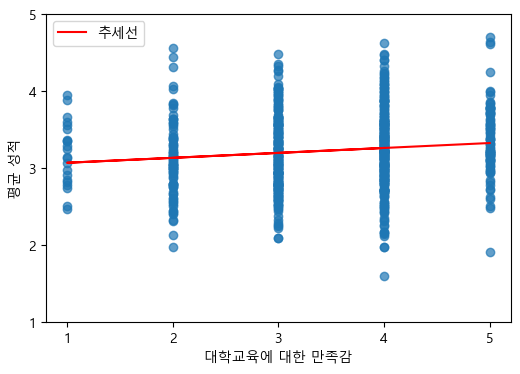

        PID  uni_satis_a01     평균 성적
0    100003            5.0  3.172222
1    100008            5.0  3.333333
2    100012            2.0  3.222222
3    100016            3.0  3.266667
4    100028            4.0  3.600000
..      ...            ...       ...
712  107534            2.0  3.155556
713  107538            4.0  3.111111
714  107547            4.0  3.000000
715  107554            4.0  3.311111
716  107560            4.0  2.711111

[717 rows x 3 columns]


In [75]:
import matplotlib.pyplot as plt

# uni_satis_a01이 NaN이 아닌 경우만 추출하여 데이터프레임 생성
uni_satis_a01_df = panel_data.dropna(subset=['uni_satis_a01'])[['PID', 'uni_satis_a01']]

# 전체 WAVE에 대한 성적(score_overall) 평균값 계산 및 추가
mean_score_overall = panel_data.groupby('PID')['score_overall'].mean().reset_index()
result_df = uni_satis_a01_df.merge(mean_score_overall, on='PID', how='inner')
result_df.rename(columns={'score_overall': '평균 성적'}, inplace=True)

# 산점도 그리기
plt.figure(figsize=(6, 4))
plt.scatter(result_df['uni_satis_a01'], result_df['평균 성적'], alpha=0.7)

# 추세선 추가
coefficients = np.polyfit(result_df['uni_satis_a01'], result_df['평균 성적'], 1)
poly = np.poly1d(coefficients)
plt.plot(result_df['uni_satis_a01'], poly(result_df['uni_satis_a01']), 
         color='red', label='추세선')

# 레전드 추가
plt.legend()

# 정수값만 표시
plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

# 축 라벨 추가
plt.xlabel('대학교육에 대한 만족감')
plt.ylabel('평균 성적')

# 상관계수 계산
correlation = result_df['uni_satis_a01'].corr(result_df['평균 성적'])
print("상관계수:", correlation)

# 그래프 출력
plt.show()

# 결과 데이터프레임 출력
print(result_df)

상관계수: -0.14963089519108175


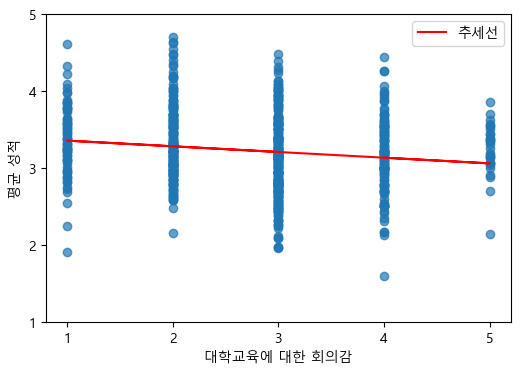

        PID  uni_satis_a03     평균 성적
0    100003            3.0  3.172222
1    100008            1.0  3.333333
2    100012            4.0  3.222222
3    100016            3.0  3.266667
4    100028            4.0  3.600000
..      ...            ...       ...
712  107534            3.0  3.155556
713  107538            4.0  3.111111
714  107547            5.0  3.000000
715  107554            4.0  3.311111
716  107560            4.0  2.711111

[717 rows x 3 columns]


In [76]:
import matplotlib.pyplot as plt

# uni_satis_a03이 NaN이 아닌 경우만 추출하여 데이터프레임 생성
uni_satis_a03_df = panel_data.dropna(subset=['uni_satis_a03'])[['PID', 'uni_satis_a03']]

# 전체 WAVE에 대한 성적(score_overall) 평균값 계산 및 추가
mean_score_overall = panel_data.groupby('PID')['score_overall'].mean().reset_index()
result_df = uni_satis_a03_df.merge(mean_score_overall, on='PID', how='inner')
result_df.rename(columns={'score_overall': '평균 성적'}, inplace=True)

# 산점도 그리기
plt.figure(figsize=(6, 4))
plt.scatter(result_df['uni_satis_a03'], result_df['평균 성적'], alpha=0.7)

# 추세선 추가
coefficients = np.polyfit(result_df['uni_satis_a03'], result_df['평균 성적'], 1)
poly = np.poly1d(coefficients)
plt.plot(result_df['uni_satis_a03'], poly(result_df['uni_satis_a03']), 
         color='red', label='추세선')

# 레전드 추가
plt.legend()

# 정수값만 표시
plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 6, 1))

# 축 라벨 추가
plt.xlabel('대학교육에 대한 회의감')
plt.ylabel('평균 성적')

# 상관계수 계산
correlation = result_df['uni_satis_a03'].corr(result_df['평균 성적'])
print("상관계수:", correlation)

# 그래프 출력
plt.show()

# 결과 데이터프레임 출력
print(result_df)

In [77]:
# panel_data 저장
panel_data.to_csv('../Data/panel_data.csv', index=False)